# Free Stationing
This notebook illustrates how to determine the location and orientation of your total station by sighting to two known points.

## NOTE
All distances in this example are horizontal distances. The distance measured by the total station also includes a difference in elevation between the two points (the $Z$ coordinates, calculating the true elevation of the station you are at is straightforward from the lecture slides ) thus you would need to use $r \cos\theta$ where $r$ is the sight distance between the two points, $\theta$ is the vertical angle between the horizon and you're sight points.

In [1]:
import numpy as np
from scipy.constants import degree
# scipy has a bunch of useful constants that can give you some piece of mind
# for example, degree here can be used to convert a number in degrees to radians by multiplication.

Assume we have set up our base station at an unknown point $C$. We also reference the heading angle to an approximate (but not accurate) north direction $\tilde{N}$, and measure angles clockwise (CW) from $\tilde{N}$

We measure 4 quantities:

$r_a$ = 18.027756377319946 meters

$\phi_a$ = 122.19006752597977 degrees CW from $\tilde{N}$

$r_b$ = 11.180339887498949 meters

$\phi_b$ = 25.06505117707798 degrees CW from $\tilde{N}$

<div>
<img src="https://github.com/jcapriot/GPGN_318/blob/main/Surveying/embedded_images/Measured_Items.png?raw=true" width="250"/>
</div>

We know the x and y values of locations $A$ and $B$

$ A $ = (20, 10)
$ B $ = (10, 30)


Our goal is to find the location of $C$ as well as the angle between $\tilde{N}$ and true North $N$
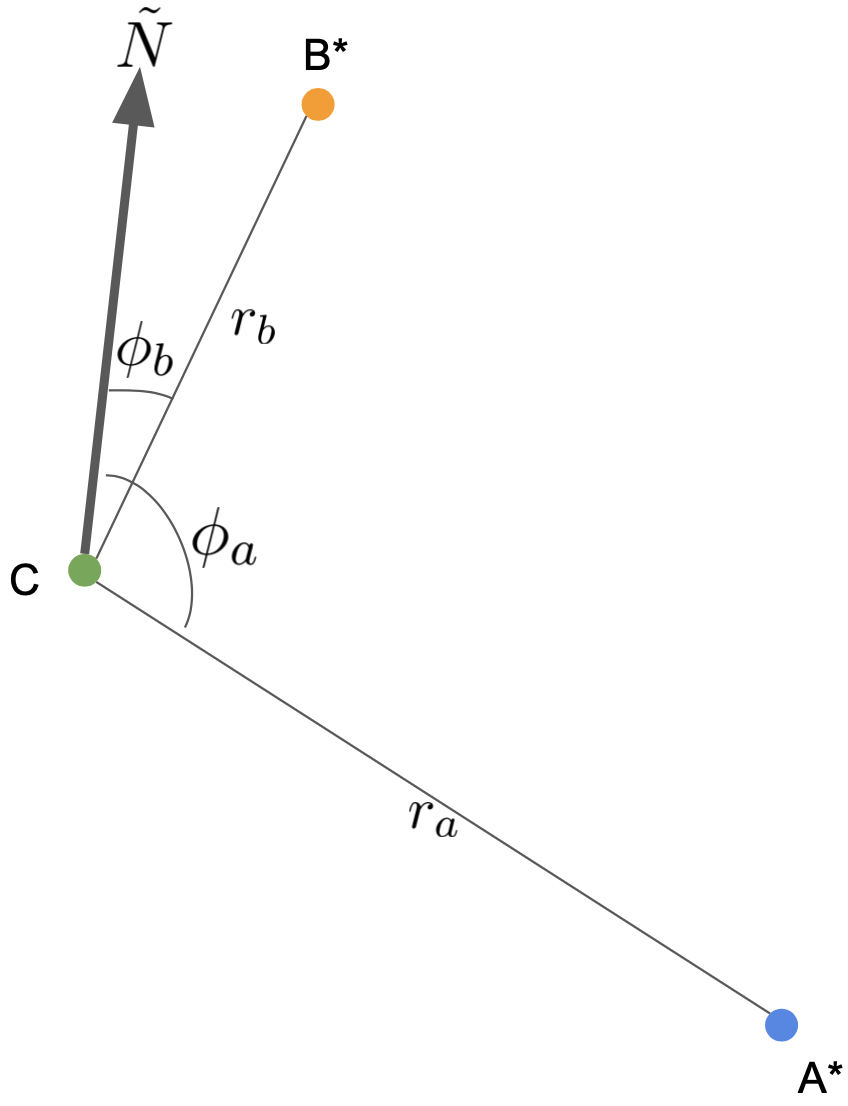

In [2]:
# knowns
A = np.array([20, 10]) # meters
B = np.array([10, 30]) # meters

# These values are the HORIZONTAL distances
# from the base station to the prisms at A and B
# i.e. they are the laser distance * cos(theta)
r_a = 18.027756377319946 # meters
r_b = 11.180339887498949 # meters

# The angle we measure in the total station is referenced to an approximate "north"
# and is positive clockwise
phi_a = 122.19006752597977 * degree
phi_b = 25.06505117707798 * degree

First calculate the interior angle, $\angle ACB$, which is simply $\phi_a - \phi_b$, and calculate the distance from A to B, $|A-B|$
<div>
<img src="https://github.com/jcapriot/GPGN_318/blob/main/Surveying/embedded_images/ACB_angle.png?raw=true" width="250"/>
</div>
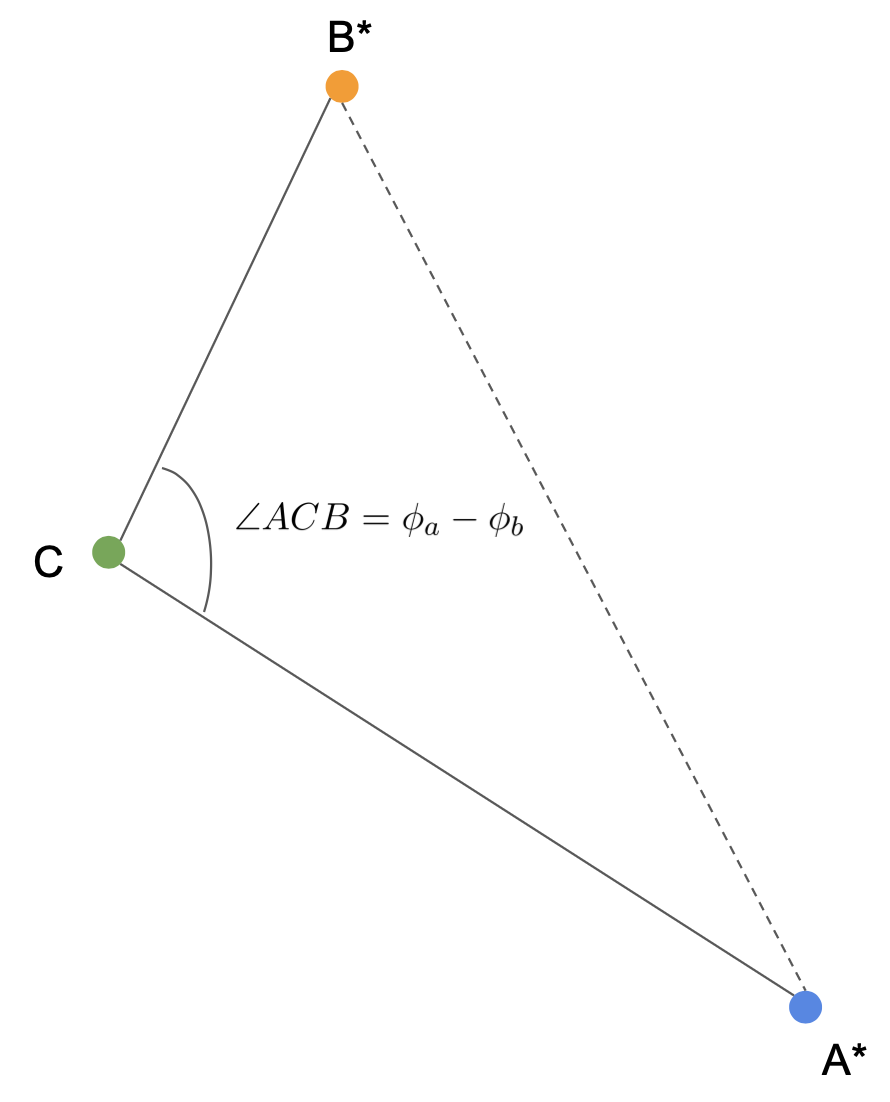

In [3]:
angle_ACB = phi_a - phi_b

ab = np.linalg.norm(A - B)

print(f"angle_ACB = {angle_ACB/degree} degrees")
print(f"length AB = {ab} meters")

angle_ACB = 97.12501634890178 degrees
length AB = 22.360679774997898 meters


We can use the law of Sines to compute other angles in the triangle now!

### Law of sins

\begin{equation}
\frac{\alpha_1}{\sin\theta_1} = \frac{\alpha_2}{\sin\theta_2} = \frac{\alpha_3}{\sin\theta_3}
\end{equation}

So in our triangle we have:
\begin{equation}
\frac{|A-B|}{\sin\angle ACB} = \frac{r_b}{\sin\angle CAB} = \frac{r_a}{\sin \angle CBA}
\end{equation}

In [4]:
angle_CAB = np.arcsin(np.sin(angle_ACB) * r_b / ab)
angle_CBA = np.arcsin(np.sin(angle_ACB) * r_a / ab)

print(f"angle CAB = {angle_CAB / degree} degrees")
print(f"angle CBA = {angle_CBA / degree} degrees")

angle CAB = 29.74488129694222 degrees
angle CBA = 53.13010235415598 degrees


In [5]:
# Double check that our angles all add up to pi (180 degrees)
angle_CAB + angle_CBA + angle_ACB

3.141592653589793

Now we can figures out the true heading from $A$ to $C$. Consider the angles in the image below:

<div>
<img src="https://github.com/jcapriot/GPGN_318/blob/main/Surveying/embedded_images/CAN_angle.png?raw=true" width="250"/>
</div>

Our goal is to find the angle $\angle CAN$ which is the clockwise angle about A between true north $N$ and $C$

We can calculate the angle about A between true north and B $\angle BAN $ using some simple trigonometry:

\begin{equation}
\angle BAN = \arctan(\frac{|B_x - A_x|}{|B_y - A_y|})
\end{equation}

It should then be clear how to calculate $\angle CAN$

\begin{equation}
\angle CAN = 2 \pi - (\angle BAN + \angle CAB)
\end{equation}
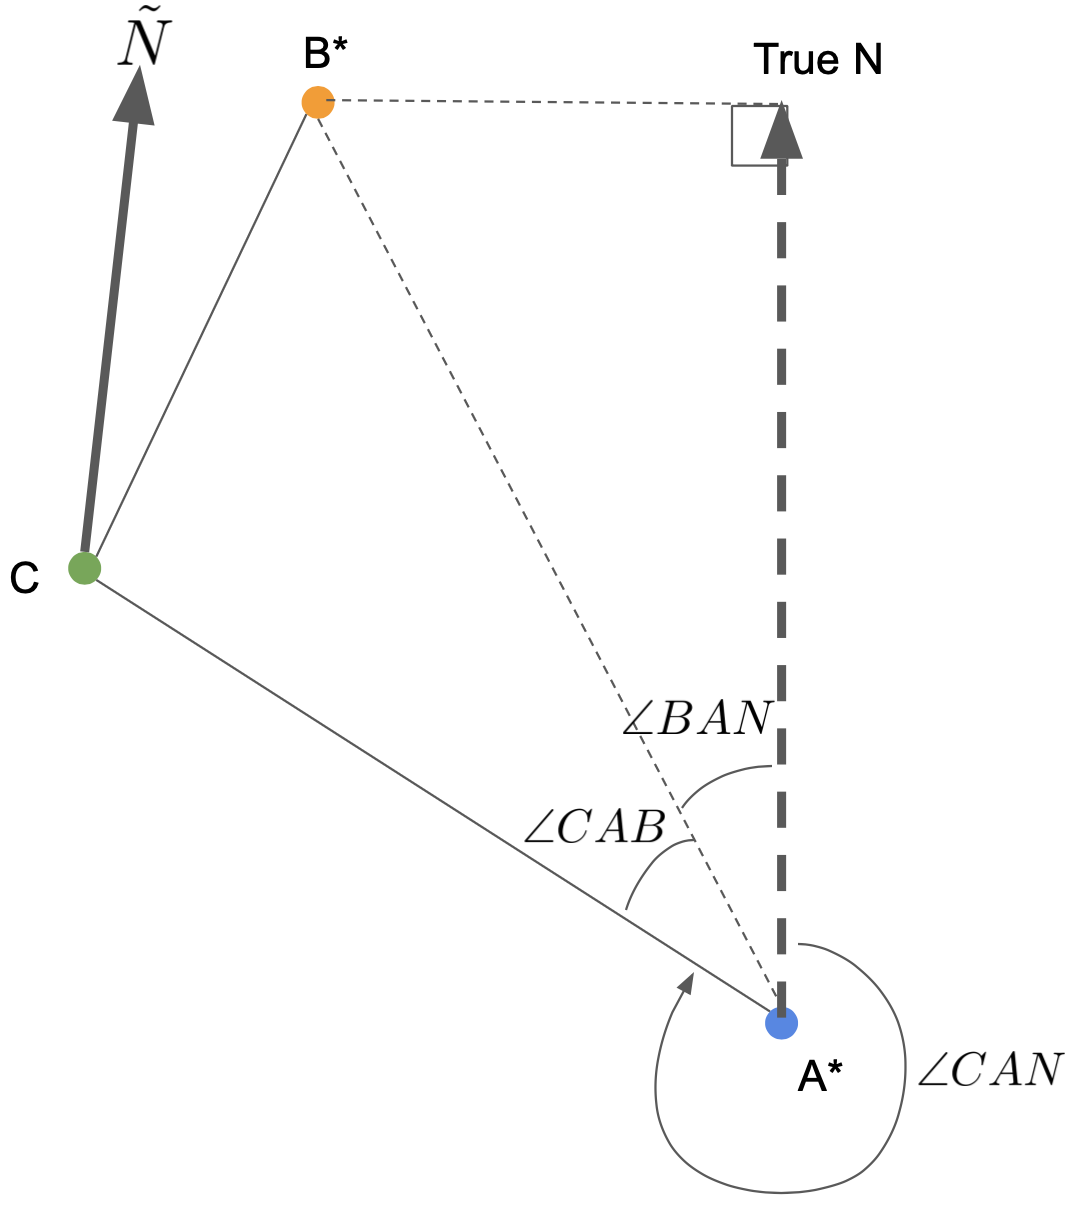

In [6]:
angle_BAN  = np.arctan2(np.abs(B[0]-A[0]), np.abs(B[1]-A[1]))

# the angle CAN = BAN - CAB  (clockwise from north)
angle_CAN = 2 * np.pi - (angle_BAN + angle_CAB)


print(f"angle BAN = {angle_BAN/degree} degrees")
print(f"angle CAN = {angle_CAN/degree} degrees")

angle BAN = 26.56505117707799 degrees
angle CAN = 303.69006752597977 degrees


We finally have a directly useful angle to calculate the location of C, lets draw a right triangle between A, C and North.

<div>
<img src="https://github.com/jcapriot/GPGN_318/blob/main/Surveying/embedded_images/C_calc.png?raw=true" width="250"/>
</div>

\begin{equation}
\Delta_x = r_a \sin\angle CAN
\end{equation}

\begin{equation}
\Delta_y = r_a \cos\angle CAN
\end{equation}
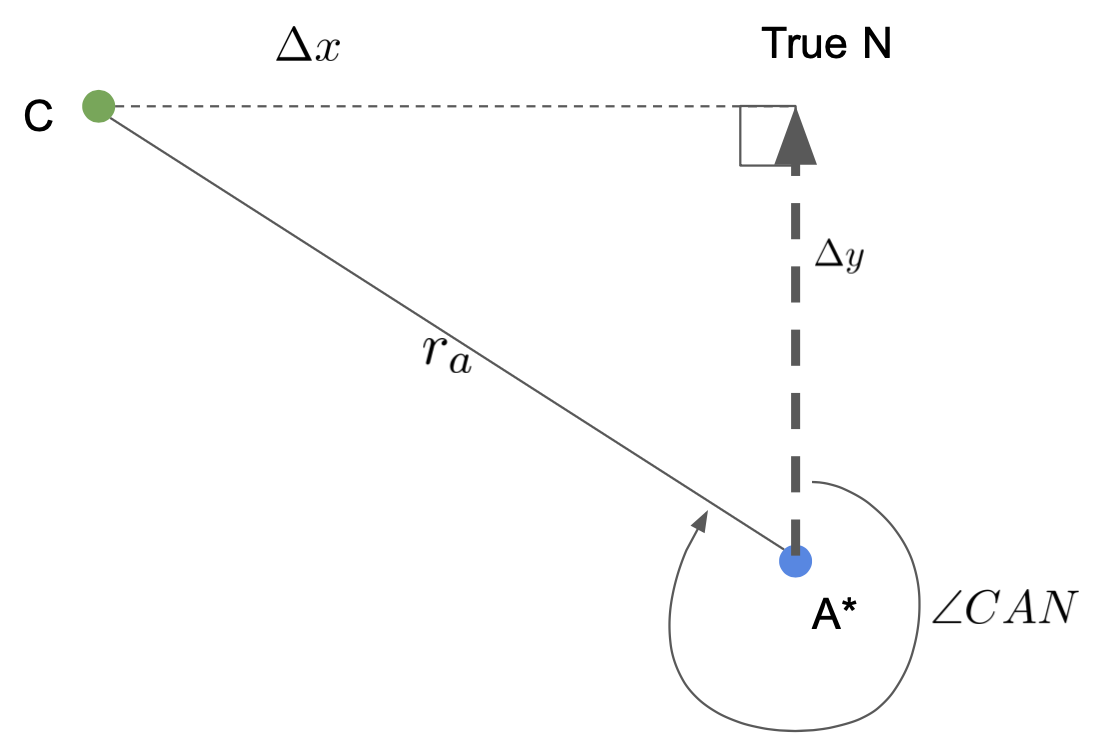

In [7]:
delta_x = r_a * np.sin(angle_CAN)
delta_y = r_a * np.cos(angle_CAN)
C_calc = A + np.r_[delta_x, delta_y]
C_calc

array([ 5., 20.])

We can now also calculate the difference between True North $N$, and our approximate north $\tilde{N}$

In [8]:
true_heading_to_A = angle_CAN - np.pi

delta_n = true_heading_to_A - phi_a

print(f"heading error = {delta_n/degree} degrees")

heading error = 1.500000000000034 degrees


That's good, the point I used to calculate all the angles was C = [5, 20] and the error I added was 1.5 degrees!

When in doubt, DRAW RIGHT TRIANGLES!